In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## 【前準備】 - 1
ボストン住宅データセットを読み込み、欠損地の有無、要約統計量を確認してください。

In [3]:
df_boston_housing = pd.read_csv('BostonHousing.csv')
print(df_boston_housing.columns)
df_boston_housing

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RN', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# 檢查缺失值情況
# 欠損値をチェックする
# check for missing values
missing_values = df_boston_housing.isnull().sum()
missing_values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RN         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
# 要約統計量
# 要約統計量を確認する
summary_statistics = df_boston_housing.describe()
summary_statistics

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 【前準備】 - 2
データセットの目的変数である「MEDV」について、データの分布を可視化し、確認してください。

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


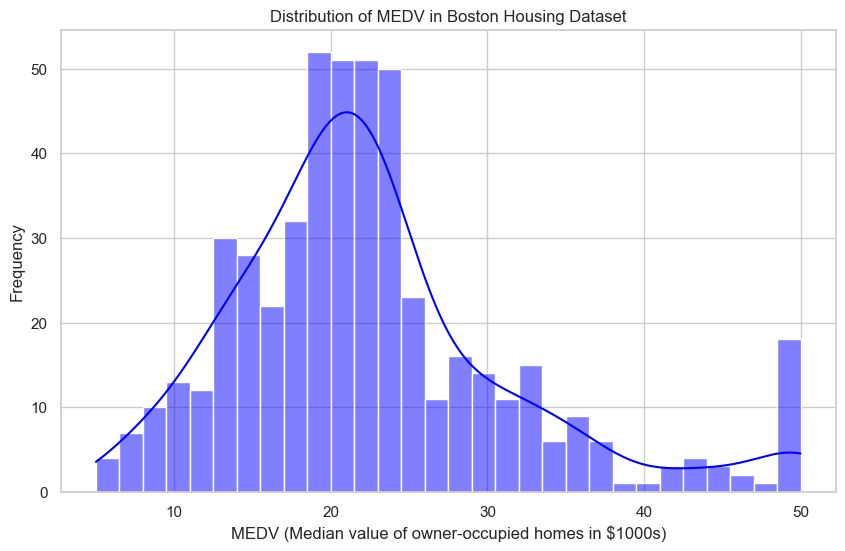

In [5]:
# 設定圖表風格
sns.set(style="whitegrid")

# 繪製目的變數"MEDV"的分布圖
plt.figure(figsize=(10, 6))
sns.histplot(df_boston_housing['MEDV'], bins=30, kde=True, color='blue')
# 設定圖表標題和標籤
plt.title('Distribution of MEDV in Boston Housing Dataset')
plt.xlabel('MEDV (Median value of owner-occupied homes in $1000s)')
plt.ylabel('Frequency')

# 顯示圖表
plt.show()

## 【前準備】 - 3
目的変数MEDVと相関が強い変数を確認するために、ヒートマップを作成し相関が高い2つの変数を選択してください。

<AxesSubplot:>

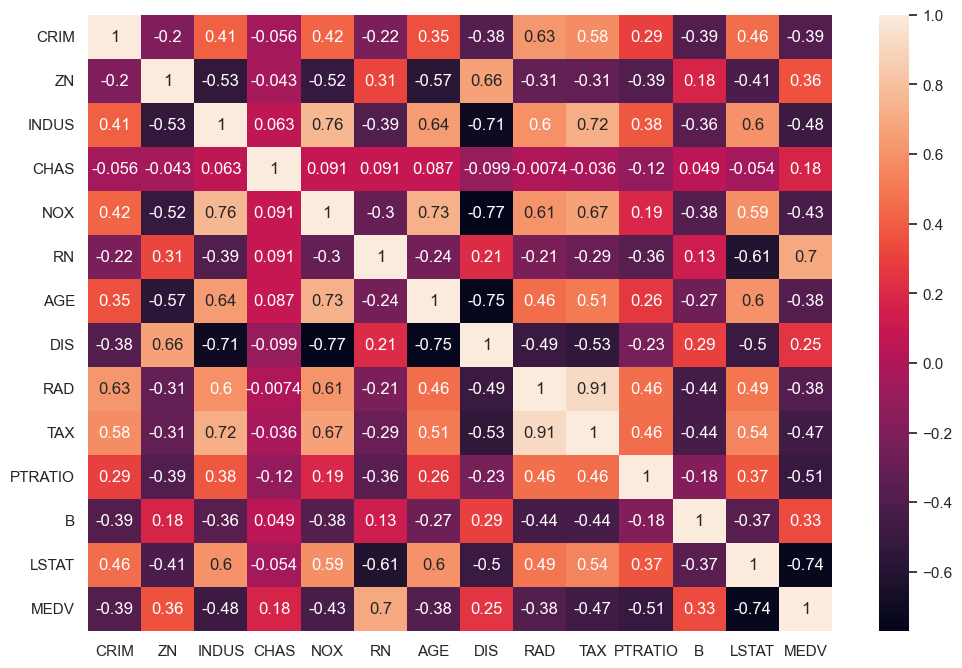

In [8]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_boston_housing.corr()
sns.heatmap(data=correlation_matrix, annot = True)

跟MEDV（房價）高度相關 ： 
* LSTAT（中低收入戶佔當地居住人口的比例）
* RN（房子有幾間房間）

## 【前準備】 - 4
上記で選択した2つの変数と、MEDVについてペアプロットを描画してください。

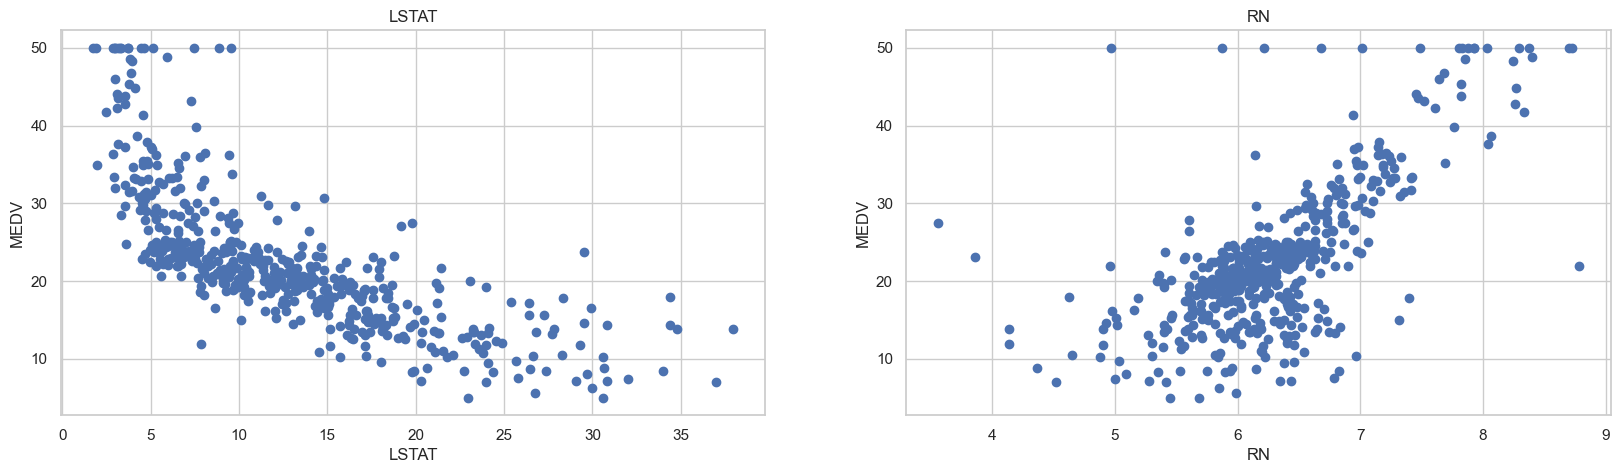

In [14]:
plt.figure(figsize=(20, 5))
features = ['LSTAT', 'RN']
target = df_boston_housing['MEDV']
for i, col in enumerate(features):
# 排版1 row, 2 columns, nth plot：在jupyter notebook上兩張並排 
 plt.subplot(1, len(features) , i+1)
 # add data column into plot
 x = df_boston_housing[col]
 y = target
 plt.scatter(x, y, marker='o')
 plt.title(col)
 plt.xlabel(col)
 plt.ylabel('MEDV')

可以看到兩者和房價變數都接近線性關係
* LSTAT和MEDV是負向關係（positive correlation）
* RM和MEDV正向關係（negative correlation）

### Visualize all features

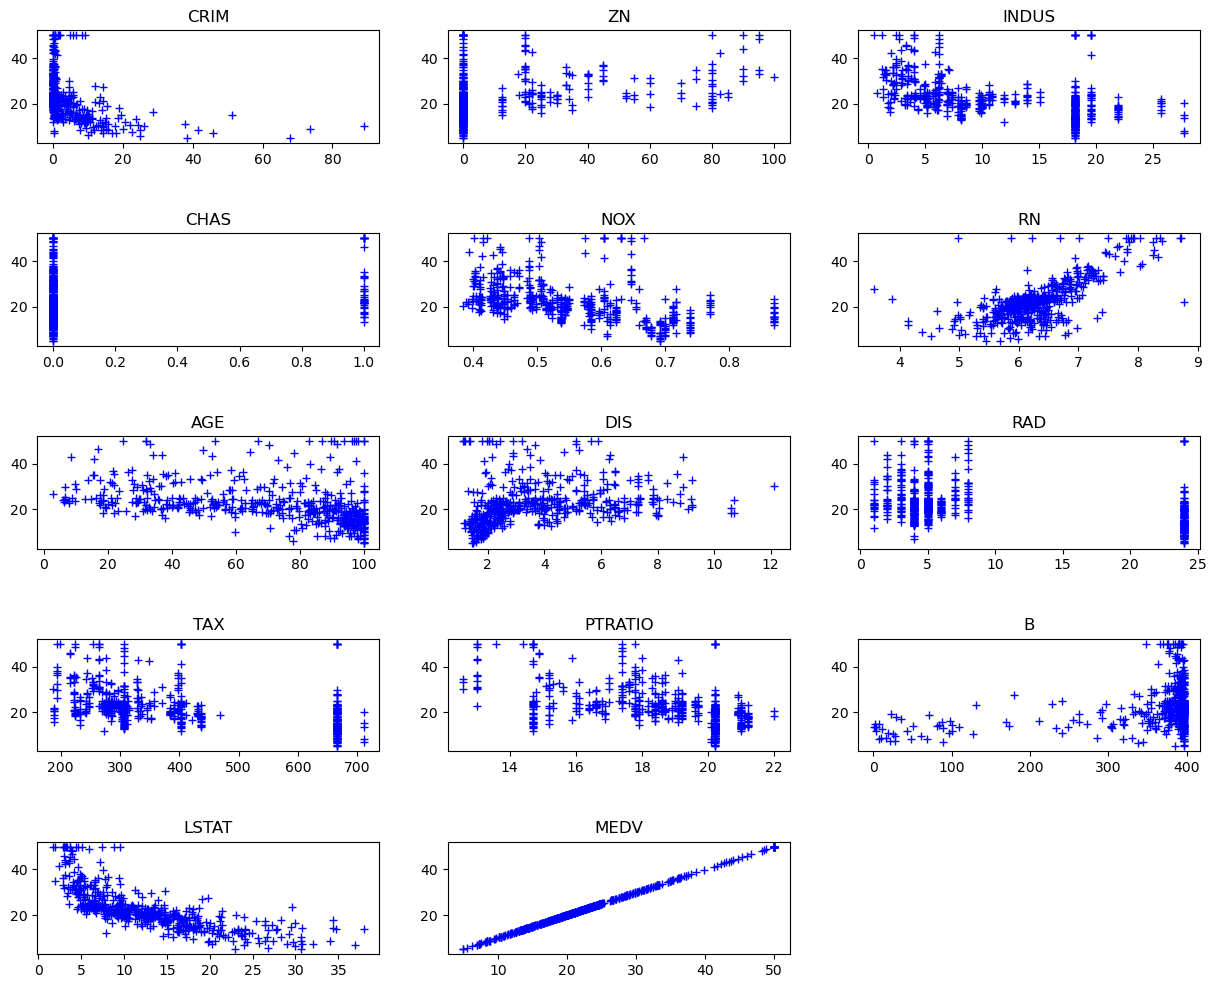

In [21]:
plt.figure(figsize=(15, 12))
columns = 3  # Specify the number of images in a row
rows = math.ceil(len(df_boston_housing.columns) / columns) 

for i in range(len(df_boston_housing.columns)):
    plt.subplot(rows, columns, i + 1)  # Specift the location of the image
    plt.plot(df_boston_housing[df_boston_housing.columns[i]], df_boston_housing['MEDV'], "b+")  # Draw relevant points
    plt.title(df_boston_housing.columns[i])  # Specify a title for each subplot
plt.subplots_adjust(hspace=0.8)  # Adjust the margins between images
plt.show()  # show images 

透過視覺化圖表分析，可以看到不同特徵的值範圍有較大差異，有些取值範圍從0到1，有些從1到100，還有0到400等等，為了消除不同量綱的影響， 可對資料進行標準化處理。 一般採用將資料減去資料組的平均數再除以標準差。 z = (x - u) / s （其中，u 表示平均值，s 表示標準差）

此外，透過圖表效果可知，部分指標與房價之間有明顯的線性關係（例如RM、LSTAT等），而有些指標與房價之間的關係則較不明顯（例如CHAS、B等）。